In [0]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")

In [215]:
from google.colab import files

testing = files.upload()

Saving test.csv to test (7).csv


In [216]:
for fn in testing.keys():
  test = pd.read_csv(fn)
 
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [217]:
training = files.upload()

Saving train.csv to train (7).csv


In [218]:
for fn in training.keys():
  train = pd.read_csv(fn)
 
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [219]:
print(test.keys())

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [220]:
print(train.keys())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [221]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [222]:
def null_table(train, test):
    print("Training Data Frame")
    print(pd.isnull(train).sum()) 
    print(" ")
    print("Testing Data Frame")
    print(pd.isnull(test).sum())

null_table(train, test)

Training Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
 
Testing Data Frame
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


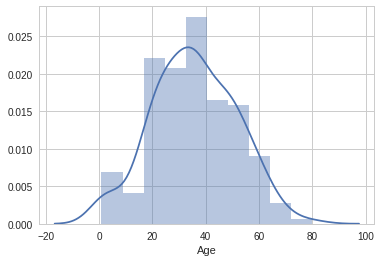

In [223]:
copy = train.copy()
copy.dropna(inplace = True)
sns.distplot(copy["Age"])


In [224]:
train["Age"].fillna(train["Age"].mode()[0], inplace = True)
test["Age"].fillna(test["Age"].mode()[0], inplace = True) 
train["Embarked"].fillna("S", inplace = True)
test["Fare"].fillna(test["Fare"].mode()[0], inplace = True)

null_table(train, test)
#replaced nan with mode

Training Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
 
Testing Data Frame
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


**plotting and visualising data **



(Based on Train data set)

 **Gender**

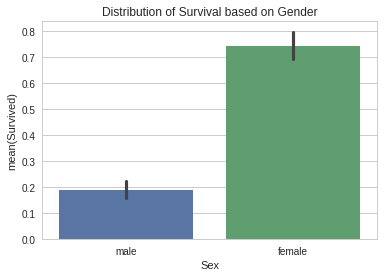

Total people survived is: 342
Proportion of Females who survived:
0.6812865497076024
Proportion of Males who survived:
0.31871345029239767


In [225]:
#can ignore the testing set for now

sns.barplot(x="Sex", y="Survived", data=train)
plt.title("Distribution of Survival based on Gender")
plt.show()

total_survived_females = train[train.Sex == "female"]["Survived"].sum()
total_survived_males = train[train.Sex == "male"]["Survived"].sum()

print("Total people survived is: " + str((total_survived_females + total_survived_males)))
print("Proportion of Females who survived:") 
print(total_survived_females/(total_survived_females + total_survived_males))
print("Proportion of Males who survived:")
print(total_survived_males/(total_survived_females + total_survived_males))

Thus gender is a really good feature

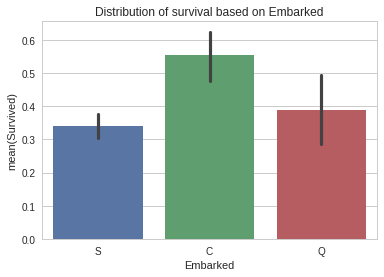

In [226]:
sns.barplot(x="Embarked", y="Survived", data=train)
plt.title("Distribution of survival based on Embarked")
plt.show()

Embarked can also be included

In [227]:
test["Embarked"] = test["Embarked"].map({'S':0, 'C':1, 'Q':2})
train["Embarked"] = train["Embarked"].map({'S':0, 'C':1, 'Q':2})

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0


In [228]:
train["Embarked"].fillna(train["Embarked"].mean(), inplace = True)
test["Embarked"].fillna(test["Embarked"].mean(), inplace = True) 
train["Embarked"].fillna("S", inplace = True)
test["Fare"].fillna(test["Fare"].mode()[0], inplace = True)

null_table(train, test)

Training Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
 
Testing Data Frame
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


**Class**

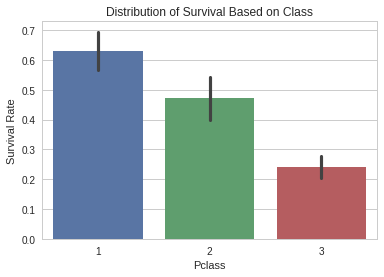

Total people survived is: 342
Proportion of Class 1 Passengers who survived:
0.39766081871345027
Proportion of Class 2 Passengers who survived:
0.2543859649122807
Proportion of Class 3 Passengers who survived:
0.347953216374269


In [229]:
sns.barplot(x="Pclass", y="Survived", data=train)
plt.ylabel("Survival Rate")
plt.title("Distribution of Survival Based on Class")
plt.show()

total_survived_one = train[train.Pclass == 1]["Survived"].sum()
total_survived_two = train[train.Pclass == 2]["Survived"].sum()
total_survived_three = train[train.Pclass == 3]["Survived"].sum()
total_survived_class = total_survived_one + total_survived_two + total_survived_three

print("Total people survived is: " + str(total_survived_class))
print("Proportion of Class 1 Passengers who survived:") 
print(total_survived_one/total_survived_class)
print("Proportion of Class 2 Passengers who survived:")
print(total_survived_two/total_survived_class)
print("Proportion of Class 3 Passengers who survived:")
print(total_survived_three/total_survived_class)

class is also a good feature.
Looks like class 1 people survived more than others.

**Dropping column**

In [230]:
train.drop(labels = ["Cabin"], axis = 1, inplace = True)
test.drop(labels = ["Cabin"], axis = 1, inplace = True)

null_table(train, test)

Training Data Frame
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
 
Testing Data Frame
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


**Featuring**

**Changing sex to binary**

In [0]:
train.loc[train["Sex"] == "male", "Sex"] = 0
train.loc[train["Sex"] == "female", "Sex"] = 1

test.loc[test["Sex"] == "male", "Sex"] = 0
test.loc[test["Sex"] == "female", "Sex"] = 1

In [233]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamSize
171,172,0,3,"Rice, Master. Arthur",0,4.0,4,1,382652,29.1250,2,6
511,512,0,3,"Webber, Mr. James",0,24.0,0,0,SOTON/OQ 3101316,8.0500,0,1
531,532,0,3,"Toufik, Mr. Nakli",0,24.0,0,0,2641,7.2292,1,1
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,0,5
263,264,0,1,"Harrison, Mr. William",0,40.0,0,0,112059,0.0000,0,1


We can combine SibSp and Parch into one synthetic feature called family size, which indicates the total number of family members on board for each member.

In [232]:
train["FamSize"] = train["SibSp"] + train["Parch"] + 1
test["FamSize"] = test["SibSp"] + test["Parch"] + 1
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamSize
36,37,1,3,"Mamee, Mr. Hanna",0,24.0,0,0,2677,7.2292,1,1
184,185,1,3,"Kink-Heilmann, Miss. Luise Gretchen",1,4.0,0,2,315153,22.0250,0,3
751,752,1,3,"Moor, Master. Meier",0,6.0,0,1,392096,12.4750,0,2
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",1,6.0,0,1,248727,33.0000,0,2
596,597,1,2,"Leitch, Miss. Jessie Wills",1,24.0,0,0,248727,33.0000,0,1


This IsAlone feature also may work well with the data we're dealing with, telling us whether the passenger was along or not on the ship.

In [0]:
train["IsAlone"] = train.FamSize.apply(lambda x: 1 if x == 1 else 0)
test["IsAlone"] = test.FamSize.apply(lambda x: 1 if x == 1 else 0)

In [235]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamSize,IsAlone
698,699,0,1,"Thayer, Mr. John Borland",0,49.0,1,1,17421,110.8833,1,3,0
625,626,0,1,"Sutton, Mr. Frederick",0,61.0,0,0,36963,32.3208,0,1,1
329,330,1,1,"Hippach, Miss. Jean Gertrude",1,16.0,0,1,111361,57.9792,1,2,0
601,602,0,3,"Slabenoff, Mr. Petco",0,24.0,0,0,349214,7.8958,0,1,1
651,652,1,2,"Doling, Miss. Elsie",1,18.0,0,1,231919,23.0000,0,2,0


In [236]:
for name in train["Name"]:
    train["Title"] = train["Name"].str.extract("([A-Za-z]+)\.",expand=True)
    
for name in test["Name"]:
    test["Title"] = test["Name"].str.extract("([A-Za-z]+)\.",expand=True)
    
    
title_replacements = {"Major": "Other", "Col": "Other", "Sir": "Other", "Don": "Other", "Mlle": "Miss", "Ms": "Miss", "Mme": "Mrs",
        "Jonkheer": "Other", "Lady": "Other", "Capt": "Other", "Countess": "Other", "Dona": "Other", "Rev": "Other", "Dr": "Other"}

train.replace({"Title": title_replacements}, inplace=True)
test.replace({"Title": title_replacements}, inplace=True)
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


In [237]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
train['Title'] = train['Title'].map(title_mapping)
train['Title'] = train['Title'].fillna(0)

test['Title'] = test['Title'].map(title_mapping)
test['Title'] = test['Title'].fillna(0)

train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamSize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,2,0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,2,0,3.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,1,1,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,2,0,3.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,1,1,1.0




```
# This is formatted as code
```

***Applying Gaussian Model***

In [0]:
from sklearn.naive_bayes import GaussianNB

To evaluate our model performance, we can use the accuracy_score function from sklearn metrics.

In [0]:
from sklearn.metrics import accuracy_score

defining features

In [0]:
features = ["Pclass", "Sex", "Age", "Fare", "FamSize", "IsAlone", "Title"]
X_train = train[features]
y_train = train["Survived"]
X_test = test[features]

In [0]:
from sklearn.model_selection import train_test_split #to create validation data set

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0) #X_valid and y_valid are the validation sets


*** GaussianNB***

In [242]:
gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)
pred_gnb = gnb_clf.predict(X_valid)
acc_gnb = accuracy_score(y_valid, pred_gnb)

print(acc_gnb)

0.8156424581005587
